In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

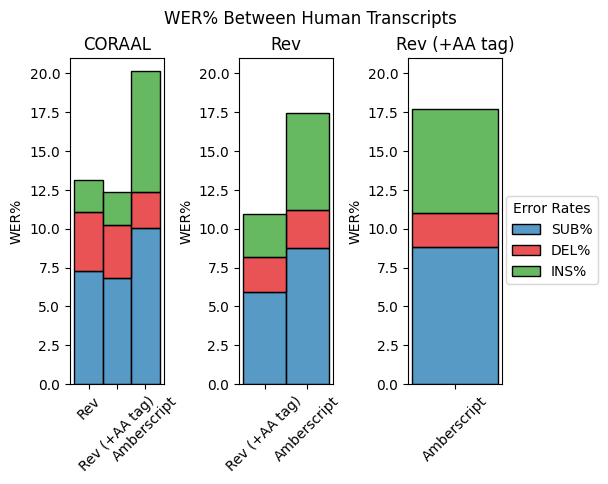

In [2]:
#Final figure had the values added to the bars in Google slides
METRICS = ["INS%", "DEL%", "SUB%"]
NORMALIZE = True

data = [
    {
        "Reference 1": "CORAAL",
        "Reference 2": "Rev",
        "WER": 13.12,
        "INS%": 2.03,
        "DEL%": 3.82,
        "SUB%": 7.27,
    },
    {
        "Reference 1": "CORAAL",
        "Reference 2": "Rev (+AA tag)",
        "WER": 12.34,
        "INS%": 2.11,
        "DEL%": 3.38,
        "SUB%": 6.85,
    },
    {
        "Reference 1": "CORAAL",
        "Reference 2": "Amberscript",
        "WER": 20.12,
        "INS%": 7.78,
        "DEL%": 2.29,
        "SUB%": 10.05,
    },
    {
        "Reference 1": "Rev",
        "Reference 2": "Rev (+AA tag)",
        "WER": 10.97,
        "INS%": 2.80,
        "DEL%": 2.24,
        "SUB%": 5.93,
    },
    {
        "Reference 1": "Rev",
        "Reference 2": "Amberscript",
        "WER": 17.48,
        "INS%": 6.28,
        "DEL%": 2.41,
        "SUB%": 8.78,
    },
    {
        "Reference 1": "Rev (+AA tag)",
        "Reference 2": "Amberscript",
        "WER": 17.67,
        "INS%": 6.68,
        "DEL%": 2.18,
        "SUB%": 8.81,
    },
 ]

new_data = []
for obj in data:
    for metric in METRICS:
        new_data.append({
            "Reference 1": obj["Reference 1"],
            "Reference 2": obj['Reference 2'],
            "Metric": metric,
            "Value": obj[metric]
        })
cmap = sns.color_palette("Paired")[1::2][:3]
cmap = cmap[1:] + [cmap[0]]
df = pd.DataFrame(new_data)
fig, axes = plt.subplots(1, 3)
for tid, transcript in enumerate(df['Reference 1'].unique()):
    ax = axes[tid]
    sns.histplot(data=df[df['Reference 1'] == transcript], x="Reference 2", weights="Value", multiple="stack", hue="Metric", ax=ax, legend=False, palette=cmap)#sns.color_palette("Paired")[1::2][::-1][:3])
    ax.set_title(transcript)
    ax.set_ylabel('WER%')
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelrotation=45)

    if NORMALIZE:
        ax.set_ylim([0, 21])

plt.subplots_adjust(right=0.8, hspace=0.5, wspace=0.8, bottom=0.2) #increased wspace from 0.5
fig.legend(title='Error Rates', loc='center right', bbox_to_anchor=(0.95, 0.5), borderaxespad=0, labels=METRICS[::-1])
fig.suptitle("WER% Between Human Transcripts")
plt.show()

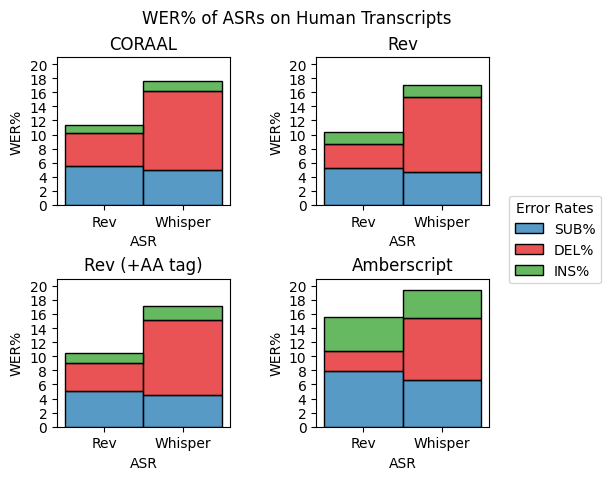

In [3]:
#Final figure had the values added to the bars in Google slides
METRICS = ["INS%", "DEL%", "SUB%"]
NORMALIZE = True
data = [
    {
        "ASR": "Rev",
        "Transcript": "CORAAL",
        "WER": 11.36,
        "INS%": 1.14,
        "DEL%": 4.64,
        "SUB%": 5.58
    },
    {
        "ASR": "Whisper",
        "Transcript": "CORAAL",
        "WER": 17.58,
        "INS%": 1.38,
        "DEL%": 11.26,
        "SUB%": 4.94
    },
    {
        "ASR": "Rev",
        "Transcript": "Rev",
        "WER": 10.36,
        "INS%": 1.65,
        "DEL%": 3.51,
        "SUB%": 5.20
    },
    {
        "ASR": "Whisper",
        "Transcript": "Rev",
        "WER": 17.08,
        "INS%": 1.73,
        "DEL%": 10.70,
        "SUB%": 4.66
    },
    {
        "ASR": "Rev",
        "Transcript": "Rev (+AA tag)",
        "WER": 10.48,
        "INS%": 1.48,
        "DEL%": 3.89,
        "SUB%": 5.12
    },
    {
        "ASR": "Whisper",
        "Transcript": "Rev (+AA tag)",
        "WER": 17.19,
        "INS%": 1.97,
        "DEL%": 10.74,
        "SUB%": 4.48
    },
    {
        "ASR": "Rev",
        "Transcript": "Amberscript",
        "WER": 15.57,
        "INS%": 4.79,
        "DEL%": 2.86,
        "SUB%": 7.92
    },
    {
        "ASR": "Whisper",
        "Transcript": "Amberscript",
        "WER": 19.38,
        "INS%": 3.95,
        "DEL%": 8.75,
        "SUB%": 6.68
    },
 ]

new_data = []
for obj in data:
    for metric in METRICS:
        new_data.append({
            "ASR": obj["ASR"],
            "Transcript": obj['Transcript'],
            "Metric": metric,
            "Value": obj[metric]
        })
cmap = sns.color_palette("Paired")[1::2][:3]
cmap = cmap[1:] + [cmap[0]]
df = pd.DataFrame(new_data)
fig, axes = plt.subplots(2, 2)
for tid, transcript in enumerate(df['Transcript'].unique()):
    ax = axes[tid // 2, tid % 2]
    snsplot = sns.histplot(data=df[df['Transcript'] == transcript], x="ASR", weights="Value", multiple="stack", hue="Metric", ax=ax, legend=False, palette=cmap)#sns.color_palette("rocket_r", n_colors=3))#"Paired")
    ax.set_title(transcript)
    ax.set_ylabel('WER%')
    ax.set_yticks(range(0,21,2))

    if NORMALIZE:
        ax.set_ylim([0, 21])
    handles, labels = ax.get_legend_handles_labels()
plt.subplots_adjust(right=0.8, hspace=0.5, wspace=0.5)
fig.legend(title='Error Rates', loc='center right', bbox_to_anchor=(0.975, 0.5), borderaxespad=0, labels=METRICS[::-1])
fig.suptitle("WER% of ASRs on Human Transcripts")
plt.show()

In [4]:
summary_df = pd.read_csv("/Users/aheuser/Documents/CORAAL/Condensed/ResultSbs/bucket_summary_new.csv",index_col=0)

In [5]:
bucket_stats = summary_df.loc[summary_df['diff_name'] == 'all_combined'].copy()
bucket_stats['proportion'] = bucket_stats['percentage']
bucket_stats['percentage'] = bucket_stats['proportion']*100
bucket_stats = bucket_stats.replace({"morpho_syntax":"morpho-syntax"})

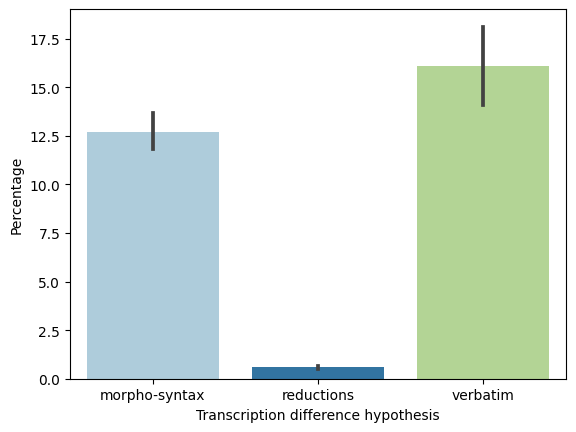

In [6]:
ax = sns.barplot(data=bucket_stats,x="diff_type",y="percentage",palette="Paired")
ax.set_xlabel("Transcription difference hypothesis")
ax.set_ylabel("Percentage")
#ax.set_title("Percentage of differences each hypothesis accounted for")
#plt.savefig("/Users/aheuser/Documents/CORAAL/Condensed/Viz/BucketPercents.png",dpi=300)
plt.show()

In [7]:
transcripts = set()
for trans in summary_df.ref_transcript.unique():
    transcripts.add(trans)
for trans in summary_df.hyp_transcript.unique():
    transcripts.add(trans)
alpha_trans = sorted([trans for trans in transcripts]) #convert to list

In [8]:
#Set manual order for easier parsing of the figures
alpha_trans = ['amber', 'coraal', 'aa-rev', 'rev', 'revai_v2-async','openai-async']

In [9]:
new_names = {'revai_v2-async':'Rev ASR','openai-async':'Whisper','rev':'Rev','aa-rev':'Rev (+AA tag)', 'amber':'Amberscript',
                'coraal':'CORAAL'}

In [10]:
def make_corr_plot(df,bucket):
    df_subsec = df.loc[df['diff_type'] == bucket]
    corr_plot_pre = pd.DataFrame(columns=alpha_trans,index=alpha_trans)
    corr_plot = pd.DataFrame(columns=alpha_trans,index=alpha_trans)
    for row in df_subsec.iterrows():
        corr_plot_pre.at[row[1].ref_transcript,row[1].hyp_transcript] = row[1].percentage
    for i in range(len(corr_plot.columns)):
        for j in range(len(corr_plot.columns)):
            #if i < j:
            col = corr_plot.columns[i]
            row = corr_plot.columns[j]
            if not np.isnan(corr_plot_pre.at[row,col]):
                #corr_plot.at[row,col] = corr_plot_pre.at[row,col]*100
                corr_plot.at[row,col] = corr_plot_pre.at[row,col]
            else:
                #corr_plot.at[row,col] = corr_plot_pre.at[col,row]*100
                corr_plot.at[row,col] = corr_plot_pre.at[col,row]
    corr_plot = corr_plot.rename(index=new_names)
    corr_plot = corr_plot.rename(columns=new_names)
    return corr_plot[corr_plot.columns].astype(float) 

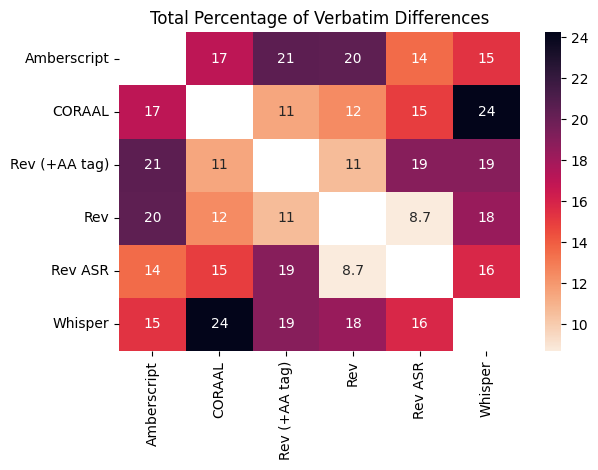

In [11]:
corr_plot = make_corr_plot(bucket_stats,"verbatim")
ax = sns.heatmap(corr_plot,annot=True,cmap=sns.cm.rocket_r)
ax.set_title("Total Percentage of Verbatim Differences")
plt.tight_layout()
#plt.savefig("/Users/aheuser/Documents/CORAAL/Condensed/Viz/VerbatimFullHeatMap.png",dpi=300)

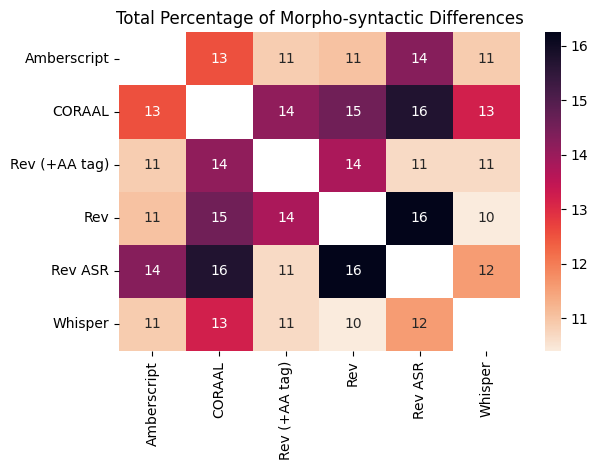

In [12]:
corr_plot = make_corr_plot(bucket_stats,"morpho-syntax")
ax = sns.heatmap(corr_plot,annot=True,cmap=sns.cm.rocket_r)
ax.set_title("Total Percentage of Morpho-syntactic Differences")
plt.tight_layout()
#plt.savefig("/Users/aheuser/Documents/CORAAL/Condensed/Viz/Morpho-syntacticFullHeatMap1.png",dpi=300)